In [10]:
import os
import pickle
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.interpolate import interp1d

from lared_laughter.constants import annot_exp_path, dataset_path
from utils import CovfeeParser

# Annotation processing

This file processes the covfee outputs into a single dataframe that aggregates the results of the human annotation experiments.
An additional pkl file is produced with the continuous results

In [11]:
# open examples
laughter_examples_df = pd.read_csv(os.path.join(annot_exp_path, 'laughter_examples', 'examples_with_rect.csv'), index_col=0)
speech_examples_df = pd.read_csv(os.path.join(annot_exp_path, 'speech_examples', 'examples_with_rect.csv'), index_col=0)
calibration_examples_df = pd.read_csv(os.path.join(annot_exp_path, 'calibration_examples', 'examples.csv'))

In [12]:
laughter_examples_df['onset_time']     = laughter_examples_df['ini_time'] - laughter_examples_df['_ini_time']
laughter_examples_df['offset_time']    = laughter_examples_df['_end_time'] - laughter_examples_df['ini_time']
speech_examples_df['onset_time']       = speech_examples_df['ini_time'] - speech_examples_df['_ini_time']
speech_examples_df['offset_time']      = speech_examples_df['_end_time'] - speech_examples_df['ini_time']
calibration_examples_df['onset_time']  = calibration_examples_df['ini_time'] - calibration_examples_df['_ini_time']
calibration_examples_df['offset_time'] = calibration_examples_df['_end_time'] - calibration_examples_df['ini_time']

In [13]:
laughter_examples = {row['hash']: row.to_dict() for _, row in laughter_examples_df.iterrows()}
speech_examples = {row['hash']: row.to_dict() for _, row in speech_examples_df.iterrows()}
calibration_examples = {row['hash']: row.to_dict() for _, row in calibration_examples_df.iterrows()}
print((len(laughter_examples), len(speech_examples), len(calibration_examples)))

(1684, 785, 6)


In [14]:
results_path_1 = os.path.join(annot_exp_path, 'covfee1')
results_path_2 = os.path.join(annot_exp_path, 'covfee2')

In [7]:
# open covfee results
parser = CovfeeParser(laughter_examples, speech_examples, calibration_examples)
all_results, hit_info = parser.parse_v1(results_path_1)

HIT 024a80de5a3a053d40e1b7f3086e70c34cd90fc2a9668ccc6c47f7293425a185, segments: 90
HIT 09fe792fe33e080ad0c73984d8d7c8516a2ed7c5e13598f08c01dac11dc2c718, segments: 90
HIT 1d181a27e25bf89a6f33298b03a1826d9ef1e003197d77190bb8b18f45c73284, segments: 90
HIT 3043daaa2251d5bb838d07f549ac19b7d41fb1880bca6ab36da5bb0920851459, segments: 90
HIT 35f50eef5e40d005a0a8062d9e72a6adc5d9400e5ad7a91ff7e47e2cc073428f, segments: 90
HIT 3b804f3cf294726af761efaff5fb5974e2712846ce485d068b4baf4118b3d8b6, segments: 90
json_res is None for file /mnt/c/Users/Jose/gdrive/data/lared_laughter/annotation_experiment_2/covfee1/4198c11729cea33268040a725998f16478a6564d4af091b2d40b84d727e35aaa/111_rating_0219ab2467ec6269e71c5445002aaece1e03a2ea4f65aedf1f4da0a75aeffbcb_video_1_0_0.json
HIT 4198c11729cea33268040a725998f16478a6564d4af091b2d40b84d727e35aaa, segments: 90
HIT 47d05370e41ca3944898561425eb80a67ee2dbc340a69b1bf7fffc5a8a1d461c, segments: 90
HIT 52d6fd4da8cd7cf5dcf857e4f32189a3874630f801cff45ad73b079c44ccabcb, segme

KeyboardInterrupt: 

In [15]:
all_results_2, hit_info_2 = parser.parse_v1(results_path_2)

AssertionError: Feedback not in /mnt/c/Users/Jose/gdrive/data/lared_laughter/annotation_experiment_2/covfee2/7102b1cd62227705bbbfb64895750162df5a6e0cb381aab6d294d0fdd54f39f8/169_rating_cfaad4f449b86be9ad288ccae927c65b05122487f9c8e5cf99bd8dcb846b7178_video_1_0_0.json

In [37]:
results = []
annotations = {}
for res in all_results:
    for ex_hash, example in res['processed'].items():
        results.append(res['processed'][ex_hash])

        if ex_hash in res['continuous']:
            assert 'has_continuous' in example
            annot = interp_30fps(
                res['continuous'][ex_hash],
                example_len=(example['_end_time']-example['_ini_time'])
            )
            # print((example['hit_id'], example['hash']))
            # print((example['condition'], len(annot), (example['_end_time']-example['_ini_time']), (example['_end_time']-example['_ini_time'])*30))
            annotations[(example['hit_id'], example['hash'], example['condition'])] = annot
        else:
            assert 'has_continuous' not in example
            print(f'Continuous annotation not found for HIT {res["hit"]} example {ex_hash}')

('024a80de5a3a053d40e1b7f3086e70c34cd90fc2a9668ccc6c47f7293425a185', 'fec1e2585d21cffcf094c615b68e22dcc88dba1d31287773b2f11bf14e09043c')
('audio', 117, 3.874643821806785, 116.23931465420355)
('024a80de5a3a053d40e1b7f3086e70c34cd90fc2a9668ccc6c47f7293425a185', 'ec84022e240482976063d686d8e9b1d59e0cbf9b46e763f658e8f2d130d15bbe')
('audio', 225, 7.487534029482958, 224.62602088448875)
('024a80de5a3a053d40e1b7f3086e70c34cd90fc2a9668ccc6c47f7293425a185', '0987eb7c8da769fc6a38242d2cc4ab1daad329bb952aa8a88e7774d38d8c6c9f')
('audio', 190, 6.315809737950985, 189.47429213852956)
('024a80de5a3a053d40e1b7f3086e70c34cd90fc2a9668ccc6c47f7293425a185', 'bbcf04f61b50904b044dee510cfec23030cb52006c0785094ef891be02ac13ee')
('audio', 165, 5.479543998688314, 164.38631996064942)
('024a80de5a3a053d40e1b7f3086e70c34cd90fc2a9668ccc6c47f7293425a185', '08755169b187562233dc5fabd6268a969fa61915c0d14cc70c37a9b4aa3e38e7')
('audio', 185, 6.133735620174775, 184.01206860524326)
('024a80de5a3a053d40e1b7f3086e70c34cd90fc2a96

In [38]:
examples = pd.DataFrame.from_dict(results)
# create a new hash column containing a rating-specific hash
# calculated from the combination of hit and example hash

In [39]:
len(examples), len(annotations), len(examples[examples['has_continuous'] == True])

(3060, 2863, 2863)

In [41]:
def filter_examples_missing_modalities(with_continuous=False):
    computational_examples = []
    for hash in examples['hash'].unique():
        hash_examples = examples[examples['hash'] == hash]
        
        video_examples = hash_examples[hash_examples['condition'] == 'video']
        audio_examples = hash_examples[hash_examples['condition'] == 'audio']
        av_examples = hash_examples[hash_examples['condition'] == 'av']

        num_examples = min(len(video_examples), len(audio_examples), len(av_examples))

        computational_examples.append(video_examples.iloc[:num_examples, :])
        computational_examples.append(audio_examples.iloc[:num_examples, :])
        computational_examples.append(av_examples.iloc[:num_examples, :])
    return pd.concat(computational_examples)

In [42]:
computational_examples_df = filter_examples_missing_modalities(with_continuous=False)
computational_examples_with_continuous_df = filter_examples_missing_modalities(with_continuous=True)

In [43]:
len(computational_examples_df)

2016

In [ ]:
out_path = os.path.join(annot_exp_path, 'processed')
results.to_csv(os.path.join(out_path, 'annotations_new.csv'))
computational_examples_df.to_csv(os.path.join(dataset_path, 'computational_examples.csv'))
pickle.dump(annotations, open(os.path.join(out_path, 'continuous.pkl'), 'wb'))

: 

# Intensity distribution

<AxesSubplot:xlabel='intensity', ylabel='Count'>

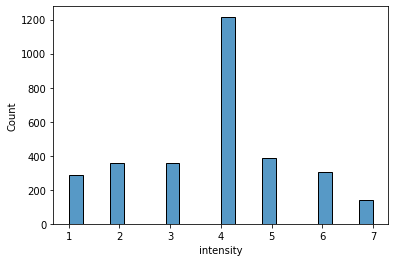

In [28]:
sns.histplot(results['intensity'])

# HIT information

In [21]:
pd.set_option('display.max_colwidth', 150)
pd.DataFrame(hit_info)

,duration,rating,feedback
0,50.016667,5.0,"The study was great because laughter is contagious - it was mood improving :) But some videos, maybe 3 of them, were not of good quality (there wa..."
1,47.800000,4.0,"a bit too long, instructions were good but a bit unclear when rating your confidence"
2,67.250000,5.0,Instructions were very much clear. Had no problems at all
3,45.116667,5.0,yes instructions were clear and it was intresting for me
4,51.316667,4.0,It was so much fun because you can notice body language and even difference in language and laughter. One thing I did have trouble with was the la...
5,36.516667,5.0,it was not too long nor tiring. the instructions were crystal clear and honestly it was kind of entertaining. some laughters were amazing!
6,51.016667,4.0,None
7,55.516667,5.0,The experiment was interesting and fun overall. The process was easy and the bar on the left side helped me see the progress I was making. \n\nIt ...
8,68.300000,5.0,"Maybe a little too long, but it was an interesting experience."
9,72.966667,5.0,The presentation of the study is clean and easy with instructions very clear. Videos that must be assessed is short. Given this it make the study ...
